# 1. Data Import and Preparation

In [2]:
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import os

import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot as pp
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.tools as tls
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
dataset_path = os.path.join('C:' + os.sep, 'Users' + os.sep, 'user' + os.sep, 'Documents' + os.sep,'EDA' + os.sep, 'black_rock.csv')
print(dataset_path)

C:\Users\user\Documents\EDA\black_rock.csv


In [4]:
df = pd.read_csv(dataset_path)
df.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,07-07-2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,07-07-2015,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6


In [5]:
df['AGE']=df['AGE'].replace('Less than 20', '20 or less')

In [6]:
colomn = df.columns
colomn

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

### Descriptive Summary

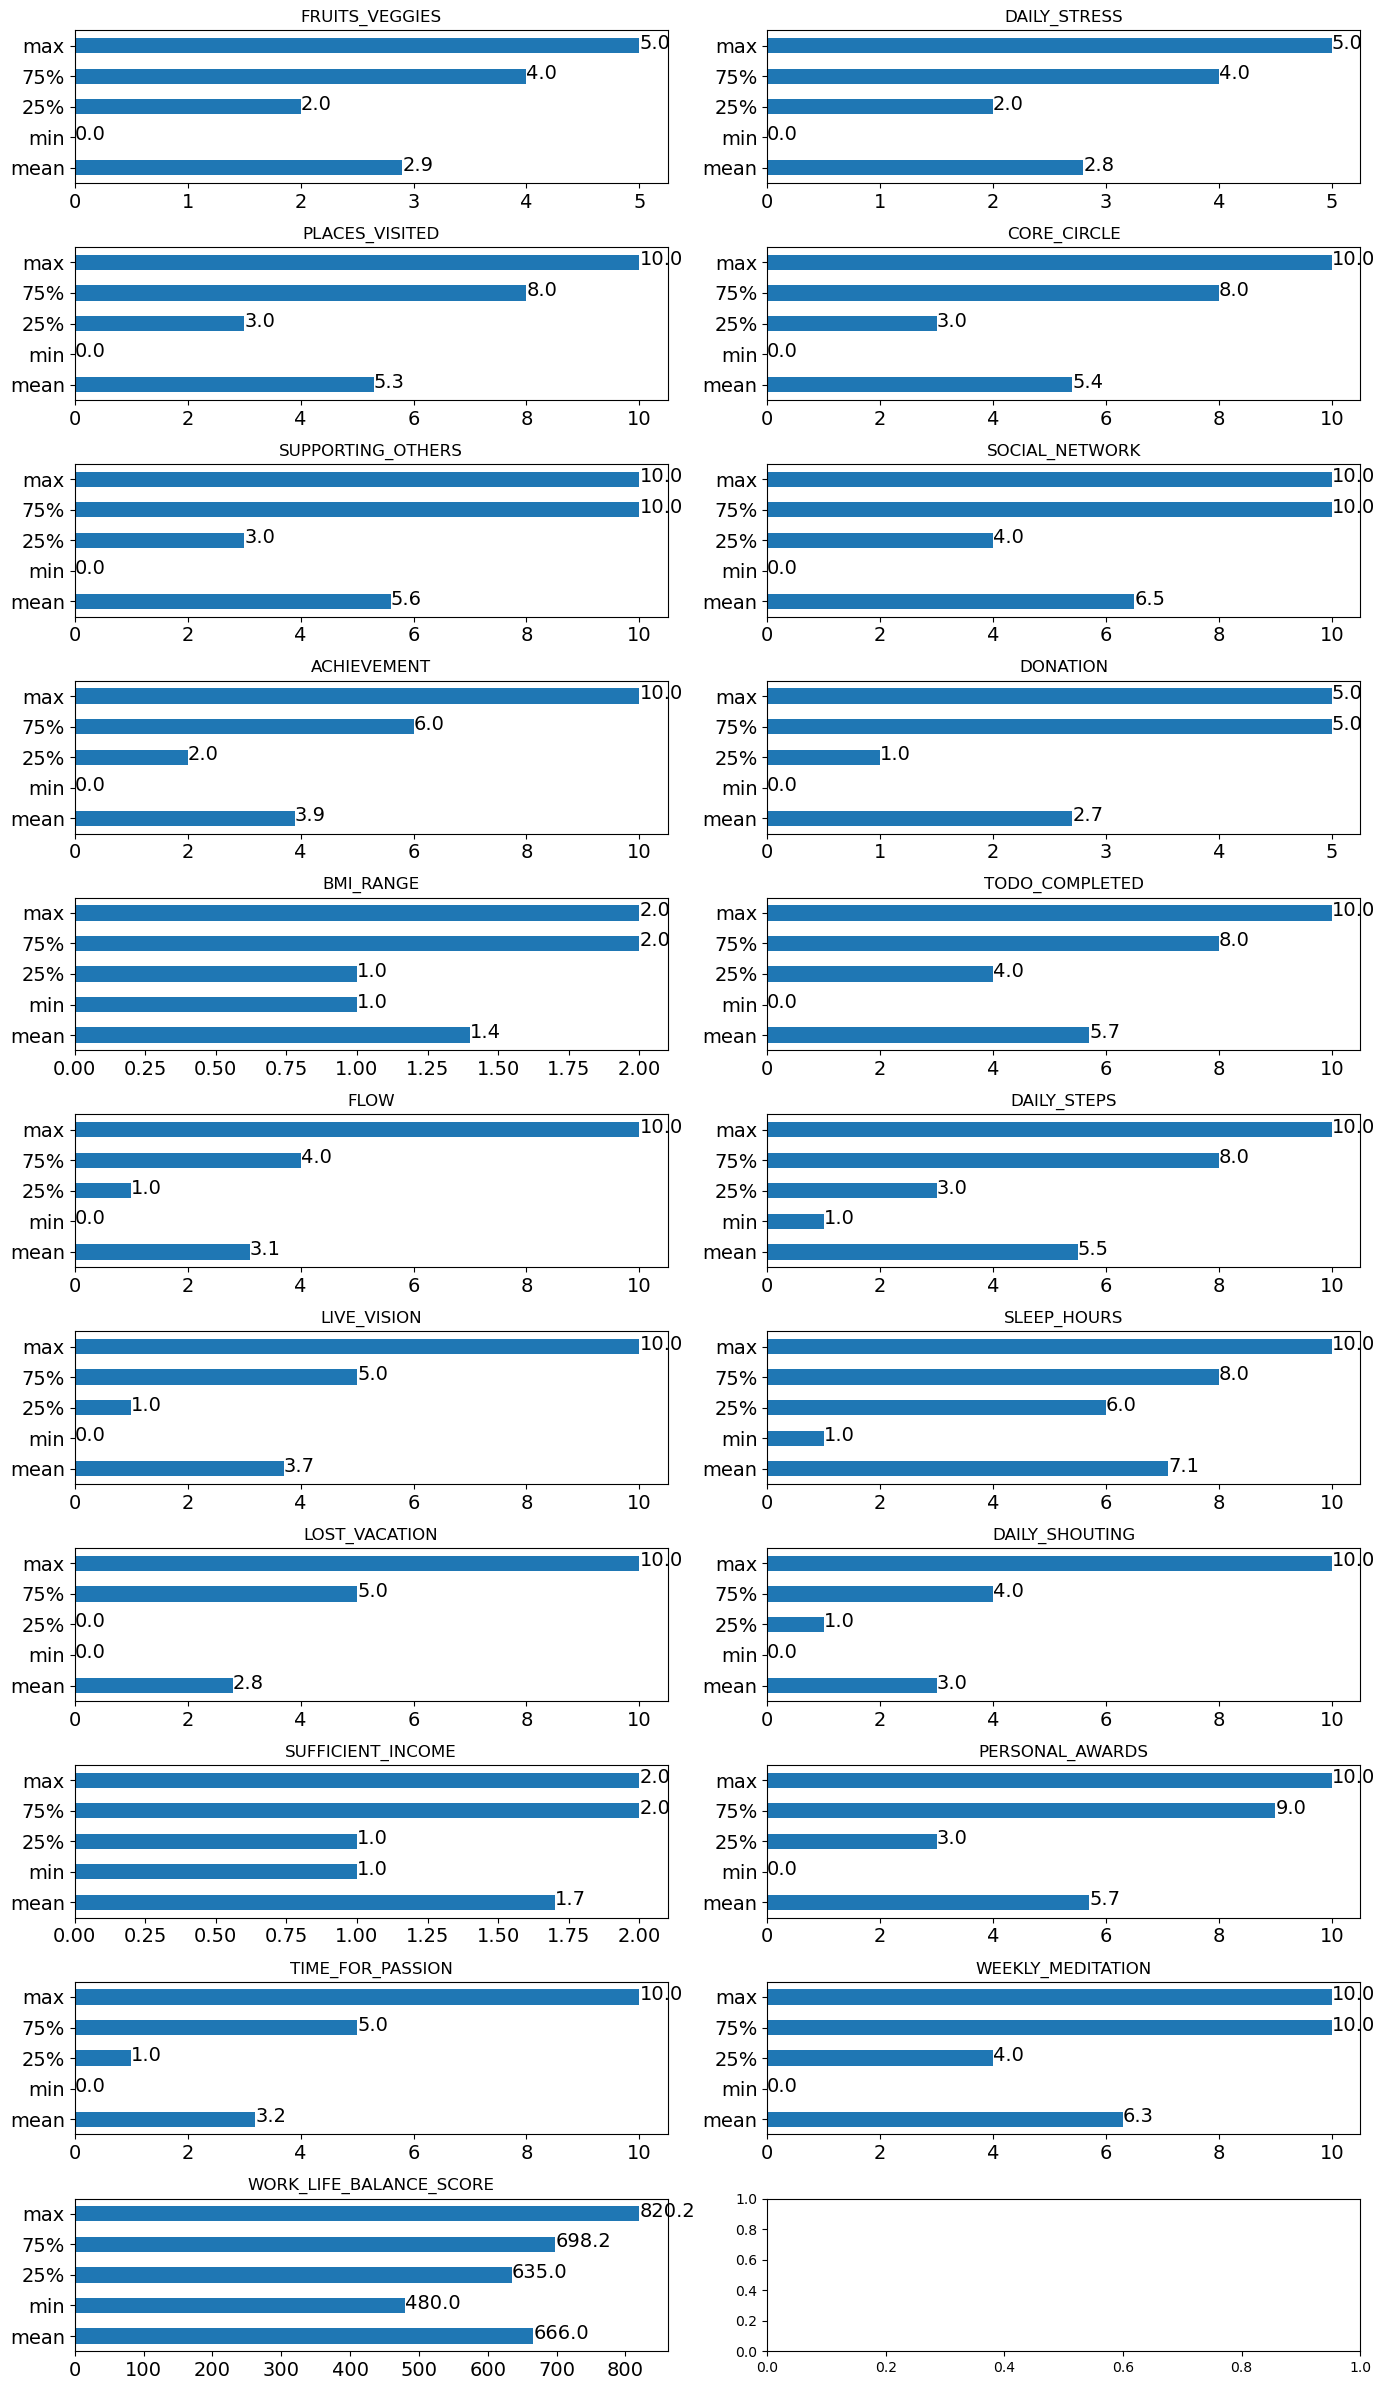

In [8]:
def descriptive(df):
    desc=df.describe().round(1).drop({'count', 'std', '50%'}, axis=0)
    i=-0.1
    j=0
    Row = int(round(len(desc.columns.tolist())/2+0.1))
    f,ax = plt.subplots(Row,2, figsize=(28,18))
    for name in desc.columns.tolist():
        desc[name].plot(kind='barh', figsize=(14,24), title=name, ax=ax[round(i), j], fontsize=14)
        for k, v in enumerate(desc[name].tolist()):
            ax[round(i), j].text(v, k-0.1, str(v), color='black', size = 14)
        i +=0.5
        if j==0: j=1
        else: j=0
    f.tight_layout()
descriptive(df)

In [44]:
df['MONTH'] = pd.DatetimeIndex(df['Timestamp']).month
df.head(3)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,MONTH
0,07-07-2015,3,2,2,5,0,5,2,0,1,...,5,5,1,4,0,5,36 to 50,Female,609.5,7
1,07-07-2015,2,3,4,3,8,10,5,2,2,...,2,2,2,3,2,6,36 to 50,Female,655.6,7
2,07-07-2015,2,3,3,4,4,10,3,2,2,...,10,2,2,4,8,3,36 to 50,Female,631.6,7


# 2. Exploratory Data Analysis (EDA)

## 2.1 Healthy body

In [45]:
df2 = df.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'], )
df2.head()

GENDER,Female,Male
AGE,,
20 or less,1.209302,1.232941
21 to 35,1.364881,1.312865
36 to 50,1.422995,1.499418
51 or more,1.526027,1.518248


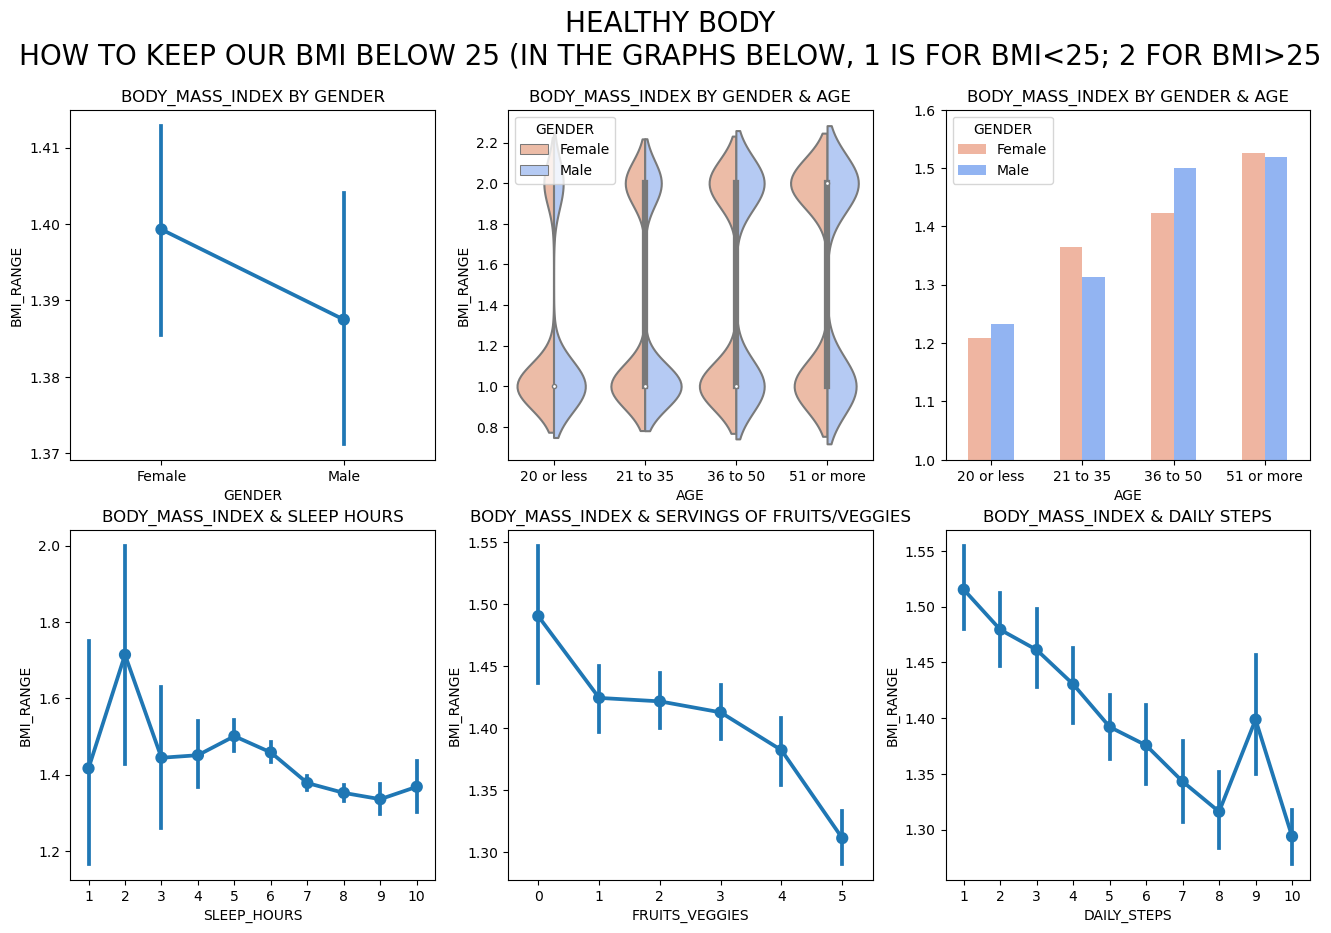

In [46]:
# HEALTHY BODY
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('BODY_MASS_INDEX BY GENDER')
ax[0,1].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[0,2].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[1,0].set_title('BODY_MASS_INDEX & SLEEP HOURS')
ax[1,1].set_title('BODY_MASS_INDEX & SERVINGS OF FRUITS/VEGGIES')
ax[1,2].set_title('BODY_MASS_INDEX & DAILY STEPS')

sns.pointplot(x = 'GENDER', y = 'BMI_RANGE',  data=df, ax = ax[0,0])
sns.violinplot(x = 'AGE', y = 'BMI_RANGE', hue = 'GENDER', data = df, palette='coolwarm_r',
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,1])

ax[0,2].set_ylim([1, 1.6])
df2.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,2])
ax[0,2].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=df, ax = ax[1,1])
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY BODY\nHOW TO KEEP OUR BMI BELOW 25 (IN THE GRAPHS BELOW, 1 IS FOR BMI<25; 2 FOR BMI>25', fontsize=20)
plt.show()

### Observations

<ul style="list-style-type:square">
  <li>Body mass index (BMI) data were painstakingly classified in this thorough study, with values of 1 for BMI less than 25 and 2 for BMI greater than 25. Notably, BMI emerged as a metric that was substantially linked to daily steps and fruit and vegetable servings, indicating surprising negative relationships. When comparing persons who walk 5,000 steps per day to those who walk less than 1,000 steps, as well as those who consume 5 servings of fruits and vegetables to those who consume less than 1 serving, both factors had a 15% influence on BMI. This result emphasizes the critical significance of physical exercise and a healthy diet in leading to a reduced BMI.</li>
  <li>Furthermore, the study revealed intriguing differences in BMI averages between age groups and gender. While BMI for men and women converged in the age ranges "less than 20" and "51 or more," interesting differences were discovered in the age ranges 21 to 35 and 36 to 50.</li>
  <li>A striking trend observed in the 21 to 35 age range, demonstrating that women had higher BMIs than their male counterparts. This discovery calls for more research into the lifestyle, food habits, and socioeconomic variables that influence BMI in this specific community.</li>
   <li>In the 36 to 50 age group, however, the study revealed a reversal of the norm, with males having higher BMIs than women. This shift in BMI dynamics across genders within this age group necessitates a thorough evaluation of potential contributing causes, which include lifestyle choices, metabolic changes, and socio-cultural impacts.</li>
   <li>The findings not only show the complex interplay between BMI, daily physical activity, and food habits, but also highlight the need for gender-specific treatments. This sophisticated knowledge might pave the way for tailored public health interventions aiming at encouraging healthier lifestyles and lowering the risk of obesity in certain demographic groups.</li>
</ul>

# 2.2 Healthy mind

In [47]:
df['DAILY_STRESS']=pd.to_numeric(df['DAILY_STRESS'],errors = 'coerce')

In [48]:
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

GENDER,Female,Male
AGE,,
20 or less,3.064784,2.232941
21 to 35,3.007738,2.572368
36 to 50,2.950319,2.810244
51 or more,2.734247,2.359489


In [49]:
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

GENDER,Female,Male
AGE,,
20 or less,3.064784,2.232941
21 to 35,3.007738,2.572368
36 to 50,2.950319,2.810244
51 or more,2.734247,2.359489


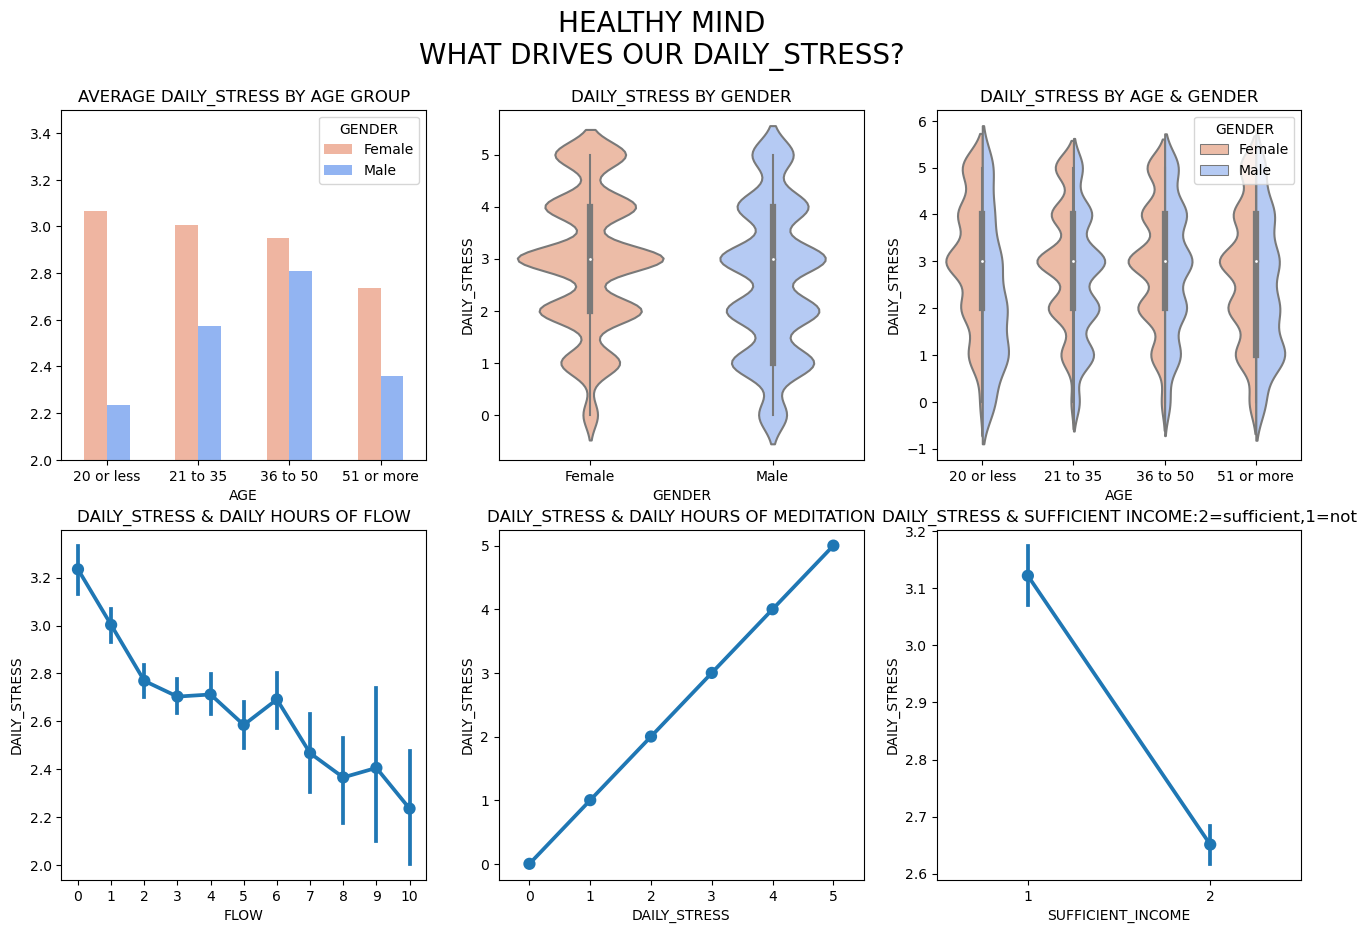

In [50]:
# HEALTHY MIND
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE DAILY_STRESS BY AGE GROUP')
ax[0,1].set_title('DAILY_STRESS BY GENDER')
ax[0,2].set_title('DAILY_STRESS BY AGE & GENDER')
ax[1,0].set_title('DAILY_STRESS & DAILY HOURS OF FLOW')
ax[1,1].set_title('DAILY_STRESS & DAILY HOURS OF MEDITATION')
ax[1,2].set_title('DAILY_STRESS & SUFFICIENT INCOME:2=sufficient,1=not')

ax[0,0].set_ylim([2, 3.5])
df3.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='DAILY_STRESS', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'DAILY_STRESS', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'FLOW', y = 'DAILY_STRESS',  data=df, ax = ax[1,0])
sns.pointplot(x = 'DAILY_STRESS', y = 'DAILY_STRESS', data=df, ax = ax[1,1])
sns.pointplot(x = 'SUFFICIENT_INCOME', y = 'DAILY_STRESS',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY MIND\nWHAT DRIVES OUR DAILY_STRESS?', fontsize=20)
plt.show()

### Observations

<ul style="list-style-type:square">
     <li>Women have the highest amounts of total stress while they are younger, and it steadily decreases as they age. Despite this drop, women's stress levels continue to exceed those of their male counterparts across all age categories.</li>
     <li>Women are more likely than males to indicate that their stress levels are increasing, while having identical average stress levels. They are also far more likely than men to experience physical and mental stress symptoms. When comparing women, it appears that there are variations in how married and single women experience stress.</li>
     <li>The American Psychological Association reached a similar result:
         <ol>
             <li>Women are more likely than males to report high levels of stress (8, 9 or 10 on a 10-point scale) (28 percent vs. 20 percent).</li>
             <li>Almost half of the women (49%) reported their stress has grown in the last five years, compared to four in ten (39%) males.</li>
             <li>Married women are more likely than single women to report feeling like they could cry (54 percent vs. 33 percent), being irritable or angry (52 percent vs. 38 percent), having headaches (48 percent vs. 33 percent), and experiencing fatigue (47 percent vs. 35 percent) as a result of stress in the previous month.</li>
         </ol>  
    </li>
</ul>

# 2.5 Passion

In [51]:
df6 = df.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

GENDER,Female,Male
AGE,,
20 or less,3.280731,3.903529
21 to 35,3.169643,3.154240
36 to 50,3.079489,3.151339
51 or more,3.268493,3.563869


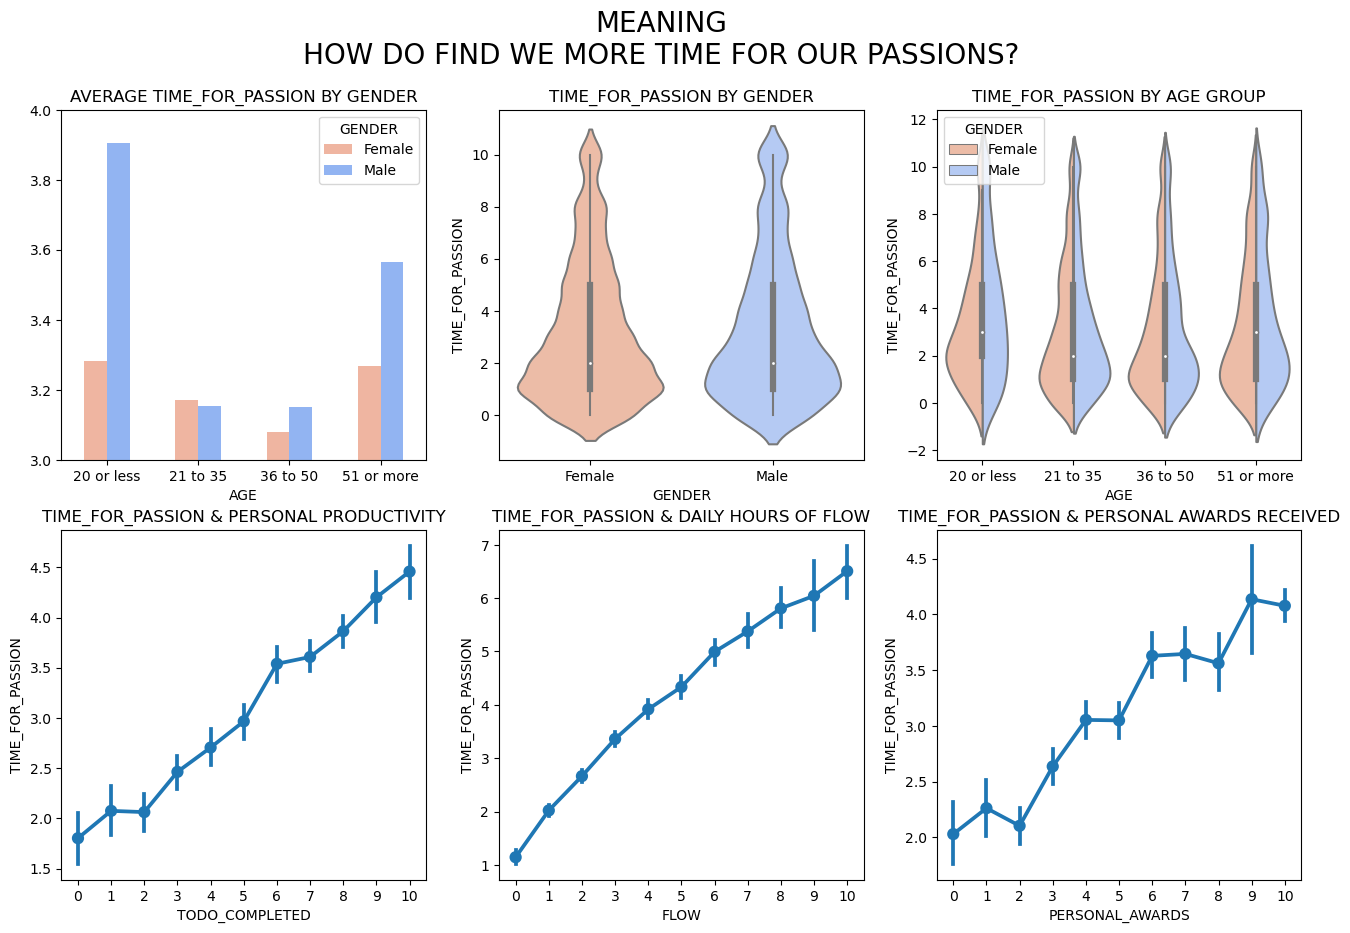

In [52]:
# PASSION
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE TIME_FOR_PASSION BY GENDER')
ax[0,1].set_title('TIME_FOR_PASSION BY GENDER')
ax[0,2].set_title('TIME_FOR_PASSION BY AGE GROUP')
ax[1,0].set_title('TIME_FOR_PASSION & PERSONAL PRODUCTIVITY')
ax[1,1].set_title('TIME_FOR_PASSION & DAILY HOURS OF FLOW')
ax[1,2].set_title('TIME_FOR_PASSION & PERSONAL AWARDS RECEIVED')

ax[0,0].set_ylim([3, 4])
df6.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0]) 
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='TIME_FOR_PASSION', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'TIME_FOR_PASSION', palette='coolwarm_r', hue = 'GENDER', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'TODO_COMPLETED',  y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FLOW',  y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,1])
sns.pointplot(x = 'PERSONAL_AWARDS', y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,2])

f.suptitle('MEANING\nHOW DO FIND WE MORE TIME FOR OUR PASSIONS?', fontsize=20)
plt.show()

### Observations

<ul style="list-style-type:square">    
    <li>Men exhibit a notable inclination to allocate more time to their passions, particularly during their younger and older years. This observation suggests a dynamic relationship between age and the pursuit of personal interests among men.The study identifies three pivotal factors strongly correlated with individuals' ability to devote time to their passions:
         <ol>
             <li><u>Daily Personal Productivity:</u>The productivity and efficiency of one's everyday tasks emerged as a crucial driver in allocating time for personal interests. Individuals with greater levels of daily personal productivity are more likely to make time for their interests, underlining the relevance of time management skills and task efficiency.</li>
             <li><u>Daily Flow:</u>Another major component was the idea of "flow," which is defined as a state of profound concentration and heightened enjoyment during an activity. Daily flow experiences were discovered to be favorably related to the ability to engage in and prioritize personal hobbies. This emphasizes the importance of intrinsic motivation and the enjoyment obtained from the action itself in aiding the incorporation of personal interests into daily living.</li>
             <li><u>Daily Personal Productivity:</u>A convincing correlation was found between the personal recognition and accolades that individuals get and their ability to devote time to their hobbies. This shows that external validation and acknowledgement influence people's commitment to and priority of their personal interests. This type of acknowledgment acts as a motivator, encouraging people to devote time to things that provide them a sense of contentment and achievement.</li>
        </ol>
    </li>   
    <li>These findings illustrate the complex interaction of individual behaviors, psychological states, and external acknowledgment in determining the pursuit of personal passions. Recognizing and comprehending these characteristics can help to influence tactics for improving individuals' abilities to incorporate their interests into their everyday lives, creating a sense of contentment and well-being in people of all ages.</li>
</ul>